In [27]:
# We will first see the result with logistic regression (just do with sklearn)
# then we will do the neural network then will seee the result
# Anubhav gupta

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# from matplotlib import style

# Dataset

Generating a dataset
Let's start by generating a dataset we can play with.
Fortunately, scikit-learn has some useful dataset generators, so we don't need to write the code ourselves.
We will go with the make_moons function.

(200, 2)
(200,)


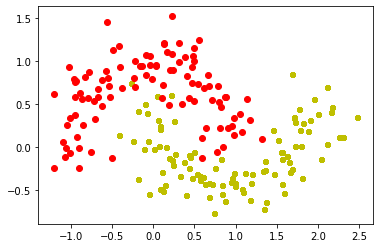

In [28]:
import sklearn
import sklearn.datasets

# np.random.seed(0)
x, y = sklearn.datasets.make_moons(200, noise=0.2,shuffle=True)   # if we increase the noise interference will increase
# x,y=normalize(x,y)
print(x.shape)
print(y.shape)

pos_one= (y==1).reshape((200,1)) 
pos_zero=(y==0).reshape((200,1))
m=len(y)
# style.use('seaborn')
plt.scatter(x[pos_one[:,0],0],x[pos_one[:,0],1],color='y',marker='+',linewidth=4)
plt.scatter(x[pos_zero[:,0],0],x[pos_zero[:,0],1],color='r',marker='o',linewidth=1)
# plt.legend(["type_1","type_2"])
# sb.scatterplot(x[pos_one[:,0],0],x[pos_one[:,0],1])
# sb.scatterplot(data=df, x="Subject 1", y="Subject 2")
plt.show()

In [29]:
# copied but understandable

def plot_decision_boundary(pred_func):
    
    x_min, x_max = x[:, 0].min() - .5, x[:, 0].max() + .5
    y_min, y_max = x[:, 1].min() - .5, x[:, 1].max() + .5
    
    h =.01
    
#     print(pred_func)
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
#     print(xx.shape)
#     print(yy.shape)
    
    
#     np.c_[np.array([1,2,3]), np.array([4,5,6])]
#     array([[1, 4],
#        [2, 5],
#        [3, 6]])
#     np.c_[np.array([[1,2,3]]), 0, 0, np.array([[4,5,6]])]
#     array([[1, 2, 3, ..., 4, 5, 6]])
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
#     print(Z.shape)
    Z = Z.reshape(xx.shape)
    
#     print(Z.shape)
    
#     print(Z)
    plt.contourf(xx,yy,Z)
    plt.scatter(x[pos_one[:,0],0],x[pos_one[:,0],1],color='b',marker='+',linewidth=4)
    plt.scatter(x[pos_zero[:,0],0],x[pos_zero[:,0],1],color='w',marker='o',linewidth=1)
    plt.title("Logistic Regression")
    plt.show()
#     plt.legend(["type_1","type_2"])
    

[1 1 1 0 0 1 1 0 1 0 1 0 0 1 1 1 1 0 1 0 0 1 1 0 1 1 0 1 1 0 0 1 0 0 0 0 0
 1 1 1 1 1 1 0 1 1 0 0 1 1 0 0 0 1 0 1 1 0 0 0 0 1 1 1 0 0 1 1 0 0 1 1 0 0
 1 1 0 1 0 0 0 1 0 0 0 1 1 1 1 0 1 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 0 1 1 1
 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 1 1 1 1 0 0
 0 0 0 1 1 0 1 0 0 1 1 1 0 1 0 0 0 1 1 0 1 0 1 1 1 1 0 1 0 1 1 1 1 1 0 0 0
 1 0 1 0 0 0 0 1 0 0 0 1 0 1 0]
(200,)


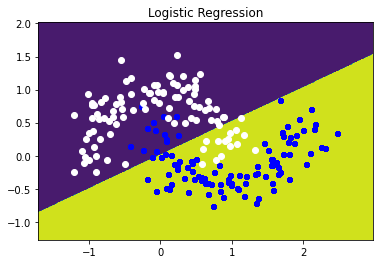

In [30]:
# now we will see that if we apply logistic regression what will be the decision boundary 

import sklearn.linear_model
clf = sklearn.linear_model.LogisticRegressionCV()
clf.fit(x, y)
zz=clf.predict(x)
print(zz)
print(zz.shape)
plot_decision_boundary(lambda x:clf.predict(x))


In [31]:
# now we will implement neural network from scratch and see the difference
layer_dims=[x.shape[1],3,x.shape[1]]  # can b vary a/c to architecture
print(layer_dims)
lenn=3
y=y.reshape((200,1))

def normalize(x,y):
    
    m_x=np.mean(x)
    m_y=np.mean(y)
    s_x=np.std(x)
    s_y=np.std(y)
    x=(x-m_x)/s_x
    y=(y-m_y)/s_y
    return x,y

[2, 3, 2]


In [32]:
def initialize_parameter_deep(layer_dims):
    
    parameters={}
    sz=len(layer_dims)
    for i in range(1,sz):
        parameters['w'+str(i)]=np.random.randn(layer_dims[i-1],layer_dims[i])*.01#/np.sqrt(layer_dims[i-1])
        parameters['b'+str(i)]=np.zeros((1,layer_dims[i]))  # 2==no. of feature
        
#         print(parameters['w'+str(i)].shape,parameters['b'+str(i)].shape)
#     print('initial')
    return parameters
parameters=initialize_parameter_deep(layer_dims)        

In [33]:
def sigmoid(z):
    return 1/(1+np.exp(-1*z))
#     return np.tanh(z)              # can use any but accordingly we'll have to change cost function

def compute_cost(parameters):
    
    As,Zs=forward_prop(x,parameters)
    Al=As['A'+str(lenn-1)]
#     print(Al)
#     print(Al.shape)
#     corect_logprobs = -np.log(Al[range(len(x)), y.reshape((200,))])   # this is cost function for tanh
#     print(corect_logprobs)
#     print(corect_logprobs.shape)
    Al[range(0,len(x)),y.reshape(200,)]-=1                # for general but after calculate heuristic function
    
    cost=Al
    cost=cost**2
    data_loss=np.sum(cost)
#     data_loss = np.sum(corect_logprobs)
#     print(data_loss)
    # Add regulatization term to loss (optional)
#     data_loss += reg_lambda/2 * (np.sum(np.square(W1)) + np.sum(np.square(W2)))
    return  data_loss/(len(x))



In [34]:
def forward_prop(x,parameters):
    
    l=len(layer_dims)
    #  using sigmoid in all
    As={}
    Zs={}
    As['A0']=x
    for i in range(1,l): 
        
        Z=As['A'+str(i-1)]@parameters['w'+str(i)]+parameters['b'+str(i)]    # unit[l]*n   m*2 , layer[i-1]*layer[i], 1*layer[i]
        Zs['Z'+str(i)]=Z
        A=sigmoid(Z)
        As['A'+str(i)]=A
#         print(Z.shape,A.shape)
    # below is softmax with probability function                    #this can also be used
#     exp_scores = np.exp(Zs['Z'+str(lenn-1)])
#     As['A'+str(lenn-1)] = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
    As['A'+str(lenn-1)]=(As['A'+str(lenn-1)]>0.5) * 1  
#     print('forward')
        
    return As,Zs    

In [35]:
def backward_prop(As,Zs,parameters,y,x,n_h):
    
    grad={}
    
    l=lenn
    dZy=As['A'+str(l-1)]
#     print('aaaa')
#     print(dZy)
    
    yy=y.reshape((200,))
#     print(yy)
 
    dZy[range(len(x)), yy] -= 1
#     print(dZy.shape,As['A'+str(l-2)].shape)
#     print(dZy)
    dWy=(As['A'+str(l-2)].T  @ dZy )
#     print(dWy.shape)
    dBy=np.sum(dZy,axis=0,keepdims=True)
#     print(dBy.shape)
    grad['dW'+str(l-1)]=dWy
    grad['dB'+str(l-1)]=dBy

    
    for i in range(l-2,0,-1):
        
#         print(parameters['w'+str(i+1)].shape)
        dZy = (  dZy @ parameters['w'+str(i+1)].T)* (As['A'+str(i)]*(1-As['A'+str(i)]))#(1 - np.power(As['A'+str(i)],2) )
        dW =  As['A'+str(i-1)].T  @ dZy
        db =  np.sum(dZy, axis=0, keepdims=True)
#         print(dZy.shape,dW.shape,db.shape)
        
        grad['dW'+str(i)]=dW
        grad['dB'+str(i)]=db
    
        
    
    return grad
    
    

In [36]:
def update_parameters(grad,parameters,learning_rate):
    
    
    for i in range(1,lenn):
        
        
        parameters['w'+str(i)]=parameters['w'+str(i)]-learning_rate*grad['dW'+str(i)]
        parameters['b'+str(i)]=parameters['b'+str(i)]-learning_rate*grad['dB'+str(i)]
    
    return parameters
        
        
    

In [37]:
def main_loop(x,y,n_h,iteration,parameters,print_cost=True):
    
    
    for i in range(iteration):
        
        As,Zs=forward_prop(x,parameters)   # using all sigmoid
#         print(As,Zs)
#         if i==0 :
#             print(Zs['Z1'],As['A1'],Zs['Z2'],As['A2'])
        
        
        
#         print(As['A'+str(lenn-1)])
        
#         print(cost.shape)
#         print('cost')
        
        grad=backward_prop(As,Zs,parameters,y,x,n_h)
#         print(grad)
        parameters=update_parameters(grad,parameters,.01)
#         print(parameters)
        cost=compute_cost(parameters)
        if i%1000==0:
            print("cost {} iteration {}".format(cost,i))
        
        

In [38]:
def prediction(x):
    
    A,Z=forward_prop(x,parameters)
    
    print(parameters)
    temp=A['A'+str(lenn-1)]
    
#     print(temp.shape)
    print(temp)
    
#     print(prob)

    res=np.argmax(temp,axis=1)
    
    return res

    
    
    
    

cost 0.1 iteration 0
cost 0.085 iteration 1000
cost 0.06 iteration 2000
cost 0.06 iteration 3000
cost 0.08 iteration 4000
{'w1': array([[-6.77324517,  5.51324582, -6.53134766],
       [-0.85880528, -7.25794422, -4.25286221]]), 'b1': array([[-3.06290432, -9.71904994,  0.26490329]]), 'w2': array([[ 2.93646289, -2.91841195],
       [-2.37698893,  2.37146005],
       [-1.73542055,  1.72609637]]), 'b2': array([[ 0.05, -0.05]])}
[[1 0]
 [1 0]
 [1 0]
 ...
 [1 0]
 [1 0]
 [1 0]]


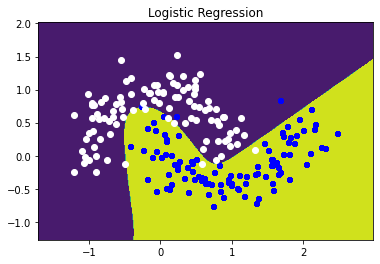

In [41]:

# print(parameters)
main_loop(x,y,3,5000,parameters)
plot_decision_boundary(lambda x:prediction(x))
# print(x)